# TwitterからWordCloud作成  
[ここ](https://qiita.com/kenmatsu4/items/9b6ac74f831443d29074)を参考に作る
## 準備  
[ここ](https://qiita.com/grachro/items/4fbc9bf8174c5abb7bdd)を参考にMeCabのインストール  
## Word Cloudの作成
ライブラリをインポートする

In [2]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
import MeCab as mc

# ツイッターのワードクラウド

## ツイート情報を取得する

In [3]:
from twython import TwythonStreamer
import json

tweets = []

class MyStreamer(TwythonStreamer):
    
    def on_success(self, data):
        
        if data['lang']=='ja':
            tweets.append(data)
            if len(tweets)%10==0:
                print("received tweet #", len(tweets))
            
            if len(tweets) >= 1000:
                self.disconnect()
    
    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

In [4]:
with open('../credentials.json', 'rt') as f:
    credentials =json.load(f)
    CONSUMER_KEY = credentials["Consumer Key"]
    CONSUMER_SECRET = credentials["Consumer Secret"]
    ACCESS_TOKEN = credentials["Access Token"]
    ACCESS_TOKEN_SECRET = credentials["Access Token Secret"]

stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

 #fujiTVのハッシュタグで過去1000データを取得してみる

In [5]:
stream.statuses.filter(track='#fujitv')

received tweet # 10
received tweet # 20
received tweet # 30
received tweet # 40
received tweet # 50
received tweet # 60
received tweet # 70
received tweet # 80
received tweet # 90
received tweet # 100
received tweet # 110
received tweet # 120
received tweet # 130
received tweet # 140
received tweet # 150
received tweet # 160
received tweet # 170
received tweet # 180
received tweet # 190
received tweet # 200
received tweet # 210
received tweet # 220
received tweet # 230
received tweet # 240
received tweet # 250
received tweet # 260
received tweet # 270
received tweet # 280
received tweet # 290
received tweet # 300
received tweet # 310
received tweet # 320
received tweet # 330
received tweet # 340
received tweet # 350
received tweet # 360
received tweet # 370
received tweet # 380
received tweet # 390
received tweet # 400
received tweet # 410
received tweet # 420
received tweet # 430
received tweet # 440
received tweet # 450
received tweet # 460
received tweet # 470
received tweet # 480
r

In [258]:
#　データを保存
import json
tweet_jsons = []

for tweet in tweets:
    tweet_json = {
            "id": tweet["id"],
            "name": tweet["user"]["name"],
            "screen_name": tweet["user"]["screen_name"],
            "text": tweet["text"],
            "created_at": tweet["created_at"],
            "retweeted_status": "retweeted_status" in tweet
    }
    tweet_jsons.append(tweet_json)
with open("tweet_data_fujitv.txt", "wt") as fout:
    json.dump(tweet_jsons, fout, ensure_ascii=False, indent=2, sort_keys=True)

In [189]:
from collections import Counter

top_hashtags = Counter(hashtag['text'].lower() 
                    for tweet in tweets
                    for hashtag in tweet["entities"]["hashtags"])

print(top_hashtags.most_common(5))

[('lovelive', 3), ('lovelive_sunshine', 3), ('aqours', 3), ('jr博多シティ', 3), ('amu博多', 3)]


## ワードクラウド生成

In [194]:
def mecab_analysis_tweet(text):
    t = mc.Tagger('-Ochasen')
    enc_text = text 
    node = t.parseToNode(enc_text) 
    output = []
    while(node):
        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(",")[0]
            if word_type in ["名詞"]:
                output.append(node.surface)
        node = node.next
        if node is None:
            break
    return output

In [208]:
def create_wordcloud_tweet(text):

    # 環境に合わせてフォントのパスを指定する。
    #fpath = "/System/Library/Fonts/HelveticaNeue-UltraLight.otf"
    fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

    # ストップワードの設定
    stop_words = [ 'てる', 'いる', 'なる', 'れる', 'する', 'ある', 'こと', 'これ', 'さん', 'して', \
             'くれる', 'やる', 'くださる', 'そう', 'せる', 'した', '思う',  \
             'それ', 'ここ', 'ちゃん', 'くん', '', 'て','に','を','は','の', 'が', 'と', 'た', 'し', 'で', \
             'ない', 'も', 'な', 'い', 'か', 'ので', 'よう', 'もの', 'ため','なかっ','CM', 'RT','https', 'co','']

    wordcloud = WordCloud(background_color="white",font_path=fpath, width=900, height=500, \
                          stopwords=set(stop_words)).generate(text)

    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [265]:
# 保存したデータをロード
with open("tweet_data.txt", "r") as fin:
    tweet_loaded=json.load(fin)

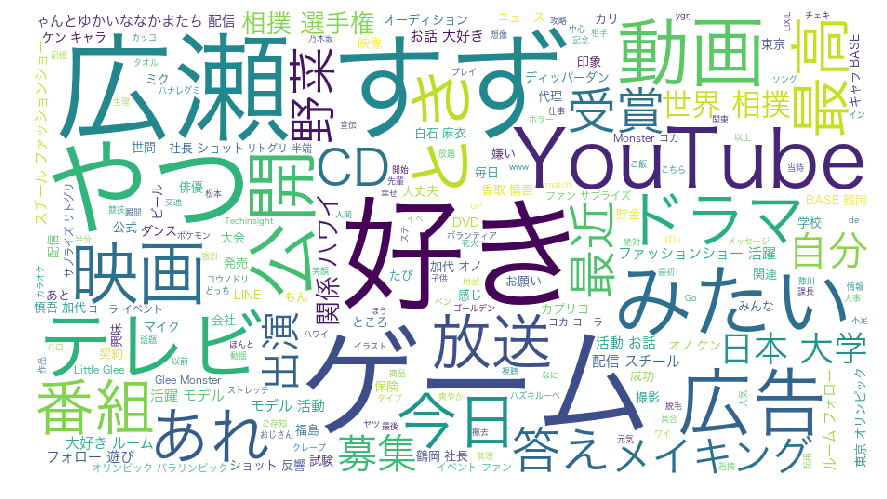

In [266]:
wordlist=[]

for tweet in tweet_loaded:
    if tweet['retweeted_status'] :
        continue
    if 'キャンペーン' in tweet["text"]: #懸賞などで自動生成されたツイートが多いので除外
        continue
    if '当たる' in tweet["text"]: #懸賞などで自動生成されたツイートが多いので除外
        continue
    wordlist += mecab_analysis_tweet(tweet['text'])

create_wordcloud_tweet(" ".join(wordlist))

In [273]:
for tweet in tweet_loaded:
    if '広瀬' in tweet['text']:
        print(tweet['name'])
        print(tweet['text'])
        print("-----")

ラヴェリア
広瀬すずが2020のcm撮ったやつようつべで公開されてる～
-----
ACTRESS PRESS
広瀬すず、「東京2020オリンピック・パラリンピック競技大会ボランティア募集CM」に出演！【広瀬すずからのメッセージ掲載】
 #広瀬すず #東京2020オリンピック・パラリンピック 
  https://t.co/FmEt36wopr
-----
ルイ
これはやばい #CM #広瀬すず #中川大志 

【8,000RT】CMで広瀬すずが中川大志に「大っ嫌い」あー言われたいwww https://t.co/T8FdU2fSkZ
-----
s u z u b e r r y ☺︎
CM メイキング  東京オリンピック、パラリンピック  広瀬すず

フリースロー1回で決まるとかカッコよすぎでしょ、、

学校にすっちゃんきて、一緒にCM撮影とか夢のまた夢の話。。

@Suzu_Mg https://t.co/3hEiwrAlB8
-----
まくたのさ
広瀬すずがCMやってるチェキの曲を弾き語り！
ハナレグミの永積タカシさんが
歌ってるよ
「ましかくチェキとお出かけ」

#広瀬すず 
#ハナレグミ https://t.co/gHLS30PJAp
-----
かつら
RT @kapo0202: 広瀬すずがCMやってるチェキの曲を弾き語り！
ハナレグミの永積タカシさんが
歌ってるよ
「ましかくチェキとお出かけ」

#広瀬すず 
#ハナレグミ https://t.co/gHLS30PJAp
-----


# 結果
最新1000ツイート内では広瀬すずのCMが人気であることが分かった
# 考察
データ数1000だと最も話題のワードに関してもツイート数は6しかない。信頼度の高い結果を得るにはサンプル数をもっと大きくする。